In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("8. Netflix Dataset.csv")

In [ ]:
sns.countplot(data,)

In [4]:
data.head(5)    #Showing the first five rows of our dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
data.tail(3)           #Showing the last five rows of our dataset

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7787,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7788,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#We can see we have 7789 rows and eleven columns
data.shape

(7789, 11)

In [7]:
data.columns  ##to show our columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [8]:
data.dtypes     ##to show the data type of each column

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [9]:
data.info()   ##to show indexes, columns, data types and memory usage all at once

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [10]:
##Checking for duplicates
data[data.duplicated()]
#shows the columns and rows that are duplicated

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [11]:
data.drop_duplicates(inplace = True) #to drop  duplicates and effect it permamnently on the dataset

In [12]:
data[data.duplicated()] #we have no more duplicates

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [13]:
data.isnull().sum()   #to check for missing values

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

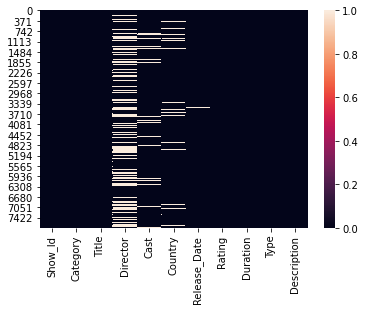

In [14]:
sns.heatmap(data.isnull())               #Using heatmap to show columns with missing rows

In [15]:
##Replacing missing values with "No info" 
data.Director = data.Director.fillna("No Info")
data.Cast = data.Cast.fillna("No Info")
data.Country = data.Country.fillna("No Info")

In [16]:
data.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           7
Duration         0
Type             0
Description      0
dtype: int64

In [17]:
#Converting the datatype of Realease date to datetime
data.Release_Date = pd.to_datetime(data.Release_Date)

In [18]:
#Extracting Year and Month from the Release_Date column
data["Year"] = data['Release_Date'].dt.year
data["Month"] = data['Release_Date'].dt.month

In [19]:
data[(data['Category']== 'Movie') & (data['Year'] == '2000')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month


In [20]:
#Number of movies and Tvshows in our dataset
data.groupby("Category").count()

,Show_Id,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month
Category,,,,,,,,,,,,
Movie,5377,5377,5377,5377,5377,5357,5372,5377,5377,5377,5357,5357
TV Show,2410,2410,2410,2410,2410,2330,2408,2410,2410,2410,2330,2330


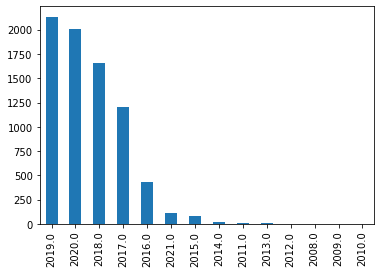

In [21]:
#The year with the highest number tv shows and movies with a bar chart
data.Year.value_counts().plot(kind = "bar")

In [22]:
#Showing only the titles of all Tv shows that were released in Nigeria
data[(data['Category']== 'TV Show')&(data.Country == "Nigeria")]['Title']

805                 Before 30
1238        Castle and Castle
1525      Crazy, Lovely, Cool
2156        Fifty: The Series
4596         Ojos in d' House
4616              On the Real
5722    Sons of the Caliphate
6414             The Governor
Name: Title, dtype: object

In [23]:
#Showing only the titles of all Movies that were released in Nigeria
data[(data['Category']== 'Movie')&(data.Country == "Nigeria")]['Title']

15                                      Oct-01
43                                     Òlòtūré
116                               4th Republic
144                                    93 Days
243                          A Trip to Jamaica
                         ...                  
6994                         The Wedding Party
6995    The Wedding Party 2: Destination Dubai
7370                                  Up North
7584                         When Love Happens
7650                           Wives on Strike
Name: Title, Length: 62, dtype: object

In [24]:
#Top 10 Directors with the highest number of tv shows and movies
data.Director.value_counts().sort_values(ascending = False).head(10)

No Info                   2388
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Jay Chapman                 12
Steven Spielberg            10
David Dhawan                 9
Name: Director, dtype: int64

In [25]:
#Showing all the records where category is movie, type is comedy or county is U.K
data[(data['Category'] == 'Movie')&(data['Type']=="Comedy")|(data.Country == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month
19,s20,Movie,'89,No Info,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018.0,5.0
58,s59,TV Show,100% Hotter,No Info,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,2019-11-01,TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019.0,11.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,2018-12-20,TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018.0,12.0
85,s86,TV Show,21 Again,No Info,Laura Morgan,United Kingdom,2020-07-01,TV-MA,1 Season,"British TV Shows, Reality TV","In a social experiment, a group of daughters s...",2020.0,7.0
93,s94,Movie,27: Gone Too Soon,Simon Napier-Bell,"Janis Joplin, Jimi Hendrix, Amy Winehouse, Jim...",United Kingdom,2018-05-01,TV-MA,70 min,Documentaries,Explore the circumstances surrounding the trag...,2018.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,No Info,Robert Powell,United Kingdom,2017-08-01,TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017.0,8.0
7671,s7670,TV Show,World's Busiest Cities,No Info,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,2019-02-01,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019.0,2.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,No Info,United Kingdom,2020-03-18,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020.0,3.0
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,2017-12-31,TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017.0,12.0


In [26]:
#How many movies or tv shows was tom cruise cast in
data['Cast'].str.contains('Tom Cruise').value_counts()

False    7785
True        2
Name: Cast, dtype: int64

In [27]:
data[data['Cast'].str.contains('Tom Cruise')]  #The two movies he was a cast in

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,2020-01-01,R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020.0,1.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2019-07-01,R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019.0,7.0


In [28]:
data.Category.unique()

array(['TV Show', 'Movie'], dtype=object)

In [29]:
#How many Tvshows got the 'R' Rating after 2018
data[(data.Category=='TV Show')&(data.Year>2018.) & (data['Rating']== 'R')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",No Info,2019-04-25,R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019.0,4.0


In [30]:
#Which Country has the highest number of Tv show
tv_shows = data[data.Category == 'TV Show']
tv_shows.Country.value_counts()

United States                                                705
No Info                                                      277
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 184, dtype: int64

In [31]:
#How many movies got Tv-14 Rating in canada
data[(data['Category']== 'Movie') & (data['Rating'] == 'TV-14') & (data['Country'] == 'Canada')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month
30,s31,Movie,#cats_the_mewvie,Michael Margolis,No Info,Canada,2020-02-05,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020.0,2.0
34,s35,Movie,#Roxy,Michael Kennedy,"Jake Short, Sarah Fisher, Booboo Stewart, Dann...",Canada,2019-04-10,TV-14,105 min,"Comedies, Romantic Movies",A teenage hacker with a huge nose helps a cool...,2019.0,4.0
608,s609,Movie,At First Light,Jason Stone,"Stefanie Scott, Theodore Pellerin, Percy Hynes...",Canada,2018-12-27,TV-14,91 min,"Dramas, Sci-Fi & Fantasy",After mysterious lights imbue her with extraor...,2018.0,12.0
1506,s1507,Movie,Counterfeiting in Suburbia,Jason Bourque,"Sarah Butler, Larissa Albuquerque, Kayla Walla...",Canada,2018-07-01,TV-14,88 min,"Dramas, Thrillers",Two teenagers print counterfeit money in their...,2018.0,7.0
3713,s3714,Movie,Long Time Running,"Jennifer Baichwal, Nicholas de Pencier","Gord Downie, Paul Langlois, Gord Sinclair, Rob...",Canada,2017-11-12,TV-14,96 min,"Documentaries, International Movies, Music & M...",This documentary follows the 2016 tour of belo...,2017.0,11.0
3956,s3957,Movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,2019-10-14,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019.0,10.0
5336,s5336,Movie,Sadie's Last Days on Earth,Michael Seater,"Morgan Taylor Campbell, Clark Backo, Ricardo H...",Canada,2017-08-22,TV-14,94 min,"Comedies, Sci-Fi & Fantasy",High schooler Sadie Mitchell believes the worl...,2017.0,8.0
5393,s5393,Movie,Sardaar ji,Rohit Jugraj,"Diljit Dosanjh, Neeru Bajwa, Mandy Takhar, Jas...",Canada,2017-12-01,TV-14,140 min,"Comedies, International Movies, Music & Musicals",When a palatial wedding venue turns out to be ...,2017.0,12.0
6062,s6062,Movie,The Accountant of Auschwitz,Matthew Shoychet,No Info,Canada,2019-07-01,TV-14,78 min,"Documentaries, International Movies","Decades after WWII, a former SS officer stands...",2019.0,7.0
7025,s7024,Movie,The Wrong Babysitter,George Mendeluk,"Daphne Zuniga, Seann Gallagher, Lisa Marie Car...",Canada,2019-06-18,TV-14,89 min,Thrillers,A widow searches for her missing teenage daugh...,2019.0,6.0


In [32]:
data[(data['Category']== 'Movie') & (data['Rating'] == 'TV-14') & (data['Country'] == 'Canada')].shape

(11, 13)

In [33]:
#Difffrent ratings in netflix
data.Rating.unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [34]:
#Country with the highest number of movies
movie = data[data.Category == 'Movie']
movie.Country.value_counts()

United States                                                   1850
India                                                            852
No Info                                                          230
United Kingdom                                                   193
Canada                                                           118
                                                                ... 
United Kingdom, Denmark, Canada, Croatia                           1
United States, South Korea                                         1
Kenya, United States                                               1
India, Turkey                                                      1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: Country, Length: 591, dtype: int64

In [35]:
#Maximum duration of a movie/show on netflix
data.Duration.unique()


array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [36]:
data[['Minute','Unit']]= data.Duration.str.split(' ', expand = True)

In [37]:
data.Minute.max()

'99'

In [38]:
#Find all instances where Category is Tv show and type is Kids Tv
data[(data['Category']=='TV Show')&(data['Type']=="Kids' TV")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Minute,Unit
111,s112,TV Show,44 Cats,No Info,"Sarah Natochenny, Suzy Myers, Simona Berman, E...",Italy,2020-10-01,TV-Y7,2 Seasons,Kids' TV,Paw-esome tales abound when singing furry frie...,2020.0,10.0,2,Seasons
276,s277,TV Show,Abby Hatcher,Kyran Kelly,"Macy Drouin, Wyatt White, Paul Sun-Hyung Lee, ...","United States, Canada",2020-07-01,TV-Y,1 Season,Kids' TV,A big-hearted girl helps her Fuzzly friends wh...,2020.0,7.0,1,Season
434,s435,TV Show,Alphablocks,No Info,"Teresa Gallagher, David Holt, Lizzie Waterworth",United Kingdom,2020-05-25,TV-Y,5 Seasons,Kids' TV,The letters of the alphabet come to life in Al...,2020.0,5.0,5,Seasons
598,s599,TV Show,Ask the StoryBots,No Info,"Judy Greer, Erin Fitzgerald, Fred Tatasciore, ...",United States,2019-08-02,TV-Y,3 Seasons,Kids' TV,Five curious little creatures track down the a...,2019.0,8.0,3,Seasons
706,s707,TV Show,Bal Ganesh,Vijay S. Bhanushali,"Meghna Erande Joshi, Parminder Ghumman",No Info,2020-03-31,TV-Y7,1 Season,Kids' TV,"Watch Ganesh destroy demons, disarm invaders a...",2020.0,3.0,1,Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7668,s7667,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",2017.0,6.0,2,Seasons
7717,s7716,TV Show,Yoko,No Info,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",No Info,2018-06-23,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",2018.0,6.0,1,Season
7719,s7718,TV Show,YOM,No Info,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",No Info,2018-06-07,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",2018.0,6.0,1,Season
7758,s7757,TV Show,Z4,No Info,"Apollo Costa, Gabriel Santana, Matheus Lustosa...",Brazil,2019-02-22,TV-PG,2 Seasons,Kids' TV,Fading music biz veteran Zé realizes he has ju...,2019.0,2.0,2,Seasons
